# [Kaggle] Mushroom classification

Safe to eat or  a deadly poison?

### Exploratory data analysis

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

In [274]:
df = pd.read_csv('mushrooms.csv')

# Num of attributes
len(df.columns)

23

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [276]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


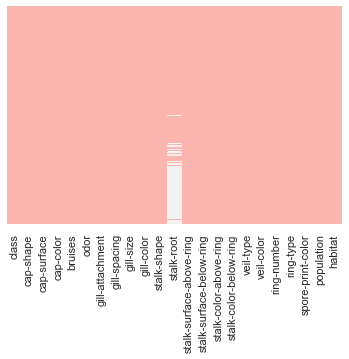

In [277]:
# Looking for missing values

# From the description, we know that there are missing values labeled as '?' in 'stalk-root'. Let's plot them out.
df.replace('?', np.nan, inplace=True)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Pastel1')

In [278]:
# And as we can see here, there's A LOT of missing data!
df['stalk-root'].isnull().sum()

2480

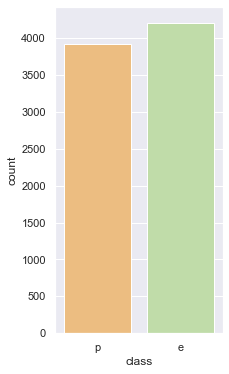

In [279]:
# Since we are dealing with a classification task, we need to somehow visualize the class distribution
plt.figure(figsize=(3, 6))
sns.countplot(x='class', data=df, palette='Spectral')

In [280]:
# We've got data with a fairly well rounded class distribution. Now we need to get rid of categorical labels.

#mapped_features = [f"{attr}_map" for attr in df.columns]
class_mapping = {'e': 0, 'p': 1}

df['class'] = df['class'].map(class_mapping)

In [284]:
def plot_hist(hue, data):
    for i, attr in enumerate(data.columns):
        plt.figure()
        sns.set(rc={'figure.figsize': (3, 2)})
        ax = sns.countplot(x=data[attr], hue=hue, data=data, palette='heat')
        
hue = df['class']
plot_data = df.drop(labels='class', axis=1)

plot_hist(hue, plot_data)

ValueError: heat is not a valid palette name

<Figure size 216x144 with 0 Axes>